<a href="https://colab.research.google.com/github/MarcoE25/Clases-Analisis-Datos/blob/main/Clase_3_intermedio_202508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐼 Maestro en Pandas - Itinerario

* **Automatizaciones con funciones**: flujo de limpieza de datos
* **Columnas condicionales**: lambdas, applys y valorizaciones
* **Merges**: unión con tabla de ejecutivos
* **Filtros**: máscaras booleanas y consultas en Pandas
* **Group by**: agrupaciones para datos agregados
* **Gráficos directos**: barras y de dispersión
* **+POO**: Creación de una clase y una librería

---

# Automatización de la función

In [ ]:
import pandas as pd
from dateutil import parser
import datetime as dt
import random as r

df_bank = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1.csv")
df_bank.head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo
0,grupo bimbo,4117589.71,MXN,OP-100000,27-Aug-2019,"April 24, 2023",1336.0
1,WALMART DE MÉXICO,7008028.47,USD,OP-100001,2017-04-10,18/02/2022,1775.0
2,liverpool,9918174.32,EUR,OP-100002,"April 21, 2017",NaN,NaN
3,grupo lala,1293043.34,USD,OP-100003,24-Nov-2023,NaN,NaN
4,FEMSA,7128647.73,EUR,OP-100004,2024-10-30,NaN,NaN


In [ ]:
# Documentaciones de funciones:
# parametros
# tarea que realiza
# salida

In [ ]:
# Primera version
def clean_1(df_func):
  """
  Limpia y transforma un DataFrame con información de operaciones financieras.

  Parámetros
  ----------
  df_func : pandas.DataFrame
      DataFrame que contiene al menos las columnas:
      - 'Fecha_Fin'
      - 'Fecha_Inicio'
      - 'Plazo'
      - 'Nombre_Empresa'
      - 'Operacion'

  Procesos realizados
  -------------------
  1. Manejo de valores faltantes:
    - 'Fecha_Fin': se reemplazan nulos con '1900-01-01'.
    - 'Plazo': se reemplazan nulos con 0.

  2. Conversión de tipos de datos:
    - 'Plazo': se convierte a tipo entero.
    - 'Fecha_Fin' y 'Fecha_Inicio': se convierten a objetos datetime usando `dateutil.parser.parse`.

  3. Limpieza y normalización de texto:
    - 'Nombre_Empresa': se eliminan espacios extra y se formatea con mayúscula inicial en cada palabra.
    - 'Operacion': se eliminan prefijos "OP-" quedándose solo con el identificador posterior.

  4. Cálculo y asignación de fecha de reporte:
    - Se genera la fecha del día anterior a la ejecución en formato "YYYY-MM-DD".
    - Se agrega la columna 'Fecha_Reporte' con dicho valor.

  Valor devuelto
  --------------
  pandas.DataFrame
      El DataFrame transformado y limpio listo para análisis o procesos posteriores.
  """
  df_func_trabajo = df_func.copy()
  ############################# PROCESO DE LIMPIEZA ############################
  # fillna() --> Rellenar valores faltantes
  df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].fillna('1900-01-01')
  df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].fillna(0)
  # astype(tipoDeDatoNuevo): cambiar el tipo de dato de la columna
  df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].astype(int)
  # Homologarlas columnas de fecha
  listaFechas = ['Fecha_Fin', 'Fecha_Inicio']
  for col_fecha in listaFechas:
    df_func_trabajo[col_fecha] = df_func_trabajo[col_fecha].apply(lambda x: parser.parse(x))
  # Formato adecuado los nombres de las empresas
  df_func_trabajo['Nombre_Empresa'] = df_func_trabajo['Nombre_Empresa'].str.strip().str.title()
  # Quitamos el OP- de la columna operacion
  df_func_trabajo['Operacion'] = df_func_trabajo['Operacion'].str.split("-").apply(lambda x: x[1])

  ############################# AGREGAMOS COLUMNAS NUEVAS ######################
  # Calculamos la fecha de hoy
  fechaReporte = dt.datetime.today() - dt.timedelta(days = 1)
  # .strftime(X, "%Y-%m-%d"): convierte el objeto fecha X a un string
  # .strptime(X, "%Y-%m-%d"): convierte un string en un objeto fecha X
  fechaReporte = dt.datetime.strftime(fechaReporte, "%Y-%m-%d")
  df_func_trabajo['Fecha_Reporte'] = fechaReporte
  return df_func_trabajo

df_bank_clean = clean_1(df_bank)

In [ ]:
#   0    1    2    3    4    5    6
# ["h", "o", "l", "a", " ", "m", "u", "n", "d", "o"]
"hola mundo"

In [ ]:
print("hola mundo"[0])
print("hola mundo"[5])

# subcadenas
# range(A, B): A, A+1, ..., B-1
# [A, B]: A, A+1, ..., B-1
print("hola mundo"[0:3])
print("hola mundo"[3:7])
# partimos del indice 3 y llegamos hasta el final
print("hola mundo"[3:])

h
m
hol
a mu
a mundo


In [ ]:
# "hola"
"hola"[::-1]

'aloh'

In [ ]:
# "Luis-Fernando".split("-") ----> ["Luis", "Fernando"]

In [ ]:
# string con comillas dobles --> ' Hola "bienvenido" '
' Hola "bienvenido" '
" Hola 'bienvenido' "

' Hola "bienvenido" '

In [ ]:
stringEjemplo = 'USD-MXN FIX (Banxico)","dblValue":18.6873,"dblChange":18.7072,"dblPerChange":-0.019899999999999807,"txtDate":"09/03"}'
stringEjemplo.split("dblValue")[1].split("dblChange")[0].replace(":", "").replace('"', "").replace(",", "")

'18.6873'

In [ ]:
# Valorizacion dinamica

# ==============================================================================
# Importacion de las librerias

import urllib.request, json
from urllib.request import urlopen
from zipfile import ZipFile
import re

def divisa_webs(clave):
  # Leemos la web y docodificamos
  url = "https://www.piplatam.com/Home/filiales?country=MX"
  page = urlopen(url)
  htmlBytes = page.read()
  html = htmlBytes.decode("utf-8")

  # De todo el string anterior, buscamos el indice donde comienza
  # la clave que estamos buscando
  strValorClave = html.find(clave)
  stringFiltro1 = html[strValorClave:]

  # USD-MXN FIX (Banxico)","dblValue":18.6873,"dblChange":18.7072,"dblPerChange":-0.019899999999999807,"txtDate":"09/03"}
  strValor = stringFiltro1.split("dblValue")[1].split("dblChange")[0]

  # ":18.6873,"
  strValor = re.findall(r"\d+\.\d+", strValor)[0]
  return strValor

print(round(float(divisa_webs("USD-MXN FIX (Banxico)")), 2))
print(round(float(divisa_webs("EUR-MXN")), 2))

18.69
21.79


In [ ]:
usdValor = round(float(divisa_webs("USD-MXN FIX (Banxico)")), 2)
eurValor = round(float(divisa_webs("EUR-MXN")), 2)

# Columnas condicionales

In [ ]:
df_bank_clean = clean_1(df_bank)
df_bank_clean.head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte
0,Grupo Bimbo,4117589.71,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-03
1,Walmart De México,7008028.47,USD,100001,2017-04-10,2022-02-18,1775,2025-09-03
2,Liverpool,9918174.32,EUR,100002,2017-04-21,1900-01-01,0,2025-09-03
3,Grupo Lala,1293043.34,USD,100003,2023-11-24,1900-01-01,0,2025-09-03
4,Femsa,7128647.73,EUR,100004,2024-10-30,1900-01-01,0,2025-09-03


In [ ]:
def valorizacion(divisa):
  """
  DOCUMENTACION
  """
  if divisa == "USD":
    return usdValor
  elif divisa == "EUR":
    return eurValor
  else:
    return 1

# 1. apply(nombreFuncion)
# 2. apply(funcion anonima)
# df_bank_clean['Valor_Divisa'] = df_bank_clean['Divisa'].apply(lambda x: valorizacion(x))
df_bank_clean['Valor_Divisa'] = df_bank_clean['Divisa'].apply(valorizacion)
df_bank_clean['Monto_Credito_Val'] = df_bank_clean['Valor_Divisa'] * df_bank_clean['Monto_Credito']

# Eliminar columnas
# del nombreDataFrame["Columna_a_Eliminar"]
del df_bank_clean['Monto_Credito']
del df_bank_clean['Valor_Divisa']

df_bank_clean.head()

,Nombre_Empresa,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Monto_Credito_Val
0,Grupo Bimbo,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-03,4.117590e+06
1,Walmart De México,USD,100001,2017-04-10,2022-02-18,1775,2025-09-03,1.309801e+08
2,Liverpool,EUR,100002,2017-04-21,1900-01-01,0,2025-09-03,2.161170e+08
3,Grupo Lala,USD,100003,2023-11-24,1900-01-01,0,2025-09-03,2.416698e+07
4,Femsa,EUR,100004,2024-10-30,1900-01-01,0,2025-09-03,1.553332e+08


In [ ]:
# Agregar una zona (donde se llevo acabo la firma-solicitud del crédito)
# [Norte, Sur, Centro]
# Clasificacion de mis creditos

###################### TAREA ###########################################
# monto_credito < 10 mdp --> Credito bajo
# monto_credito >= 10 mdp y < 100mdp ---> Credito medio
# monto_credito > 100mdp ---> Credito alto

# Libreria random

* Selecciones aleatorias
* Generación de pseudo-números aleatorios
* random.choice(nombreLista) ----> un elemento seleccionado de esa lista de manera aleatoria

In [ ]:
import random as r

zonas = ["Norte", "Sur", "Centro"]
r.choice(zonas)

'Norte'

# Listas de comprehensión

* Lista
* For

In [ ]:
# Problematica: [1, 2, 3, 4, . . ., 10000]
listaNumeros = []

for i in range(1, 10001):
  listaNumeros.append(i)

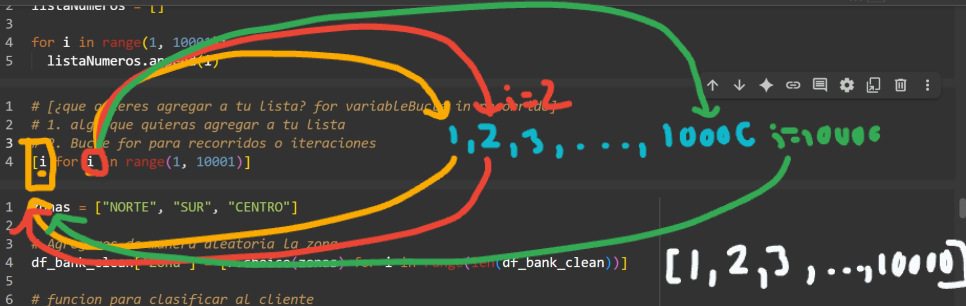

In [ ]:
# [¿que quieres agregar a tu lista? for variableBucle in recorrido]
# 1. algo que quieras agregar a tu lista
# 2. Bucle for para recorridos o iteraciones
[i for i in range(1, 10001)]

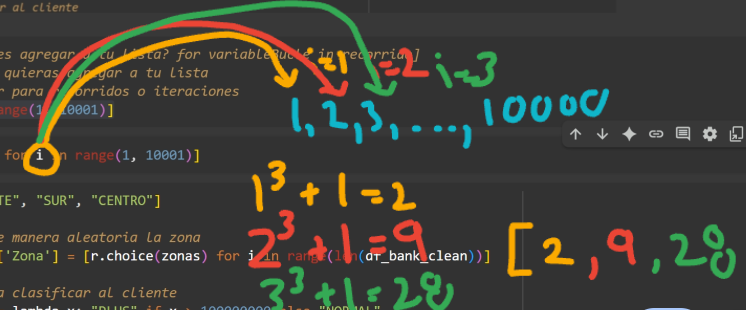

In [ ]:
[(i ** 3) + 1 for i in range(1, 10001)]

In [ ]:
# len() te arroja longitudes
print("Len calcula el número de carateres de una cadena de texto: ", len("Hola "))
print("Len calcula cuantos elementos tiene tu lista: ", len(zonas))
print("Len calcula cuantas filas tiene mi dataframe: ", len(df_bank_clean))

Len calcula el número de carateres de una cadena de texto:  5
Len calcula cuantos elementos tiene tu lista:  3
Len calcula cuantas filas tiene mi dataframe 10000


In [ ]:
# 0, 1, 2

In [ ]:
zonas = ["NORTE", "SUR", "CENTRO"]

# Agregamos de manera aleatoria la zona

# range(0, len(df_bank_clean))
df_bank_clean['Zona'] = [r.choice(zonas) for i in range(0, len(df_bank_clean))]
df_bank_clean.head()

,Nombre_Empresa,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Monto_Credito_Val,Zona
0,Grupo Bimbo,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-03,4.117590e+06,SUR
1,Walmart De México,USD,100001,2017-04-10,2022-02-18,1775,2025-09-03,1.309801e+08,NORTE
2,Liverpool,EUR,100002,2017-04-21,1900-01-01,0,2025-09-03,2.161170e+08,SUR
3,Grupo Lala,USD,100003,2023-11-24,1900-01-01,0,2025-09-03,2.416698e+07,CENTRO
4,Femsa,EUR,100004,2024-10-30,1900-01-01,0,2025-09-03,1.553332e+08,SUR
